In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Question 1**

## 1.1 

### checking dataset

In [267]:
q1_df = pd.read_csv('titanic.csv')
q1_df

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


In [268]:
q1_df.shape

(891, 10)

In [269]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [270]:
q1_df.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000


In [271]:
for i in q1_df.columns:
  print(pd.value_counts(q1_df[i]))
  print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

347082      7
CA. 2343    7
1601 

In [272]:
q1_df = q1_df.drop('Name',1)
q1_df = q1_df.drop('PassengerId',1)
q1_df = q1_df.drop('Ticket',1)
q1_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived
0,3,male,22.0,7.2500,NaN,S,0
1,1,female,38.0,71.2833,C85,C,1
2,3,female,26.0,7.9250,NaN,S,1
3,1,female,35.0,53.1000,C123,S,1
4,3,male,35.0,8.0500,NaN,S,0


### handling missing values

In [273]:
q1_df.loc[:, q1_df.isnull().any()].columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [274]:
100*q1_df.isnull().sum()/q1_df.shape[0]

Pclass       0.000000
Sex          0.000000
Age         19.865320
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Survived     0.000000
dtype: float64

In [275]:
# too many values are missing for them to be estimated, so it is better to drop the column
q1_df = q1_df.drop('Cabin',1)

In [276]:
print(pd.value_counts(q1_df['Embarked']))

S    644
C    168
Q     77
Name: Embarked, dtype: int64


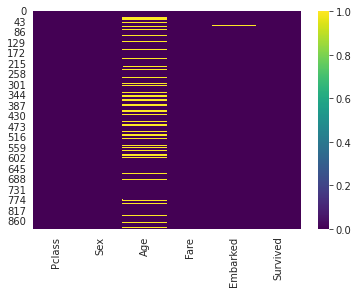

In [277]:
sns.heatmap(q1_df.isnull(),cmap='viridis')

In [278]:
q1_df['Embarked']=q1_df['Embarked'].fillna('S')
q1_df['Embarked'].isnull().sum()

0

In [279]:
print("Minimum age :",min(q1_df['Age']))
print("Maximum age :",max(q1_df['Age']))
print("Mode of age column :",q1_df['Age'].mode())
print()
pd.value_counts(q1_df['Age'])

Minimum age : 0.42
Maximum age : 80.0
Mode of age column : 0    24.0
dtype: float64



24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [280]:
q1_df['Age'].fillna(q1_df['Age'].mode()[0], inplace=True)
q1_df['Age'].isnull().sum()

0

In [281]:
q1_df = q1_df.replace({'Sex': {'female': 1, 'male': 0}})
q1_df = q1_df.replace({'Embarked': {'S': 2, 'C': 1, 'Q':0}})
q1_df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,22.0,7.2500,2,0
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,2,1
3,1,1,35.0,53.1000,2,1
4,3,0,35.0,8.0500,2,0
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,2,0
887,1,1,19.0,30.0000,2,1
888,3,1,24.0,23.4500,2,0
889,1,0,26.0,30.0000,1,1


### visualisation

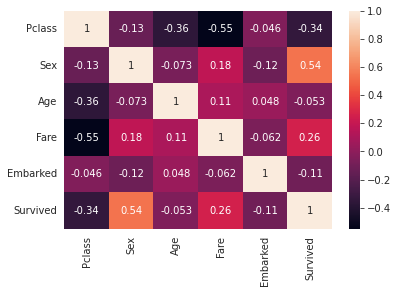

In [282]:
# plt.figure(figsize=(15,15))
correlation_matrix = q1_df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

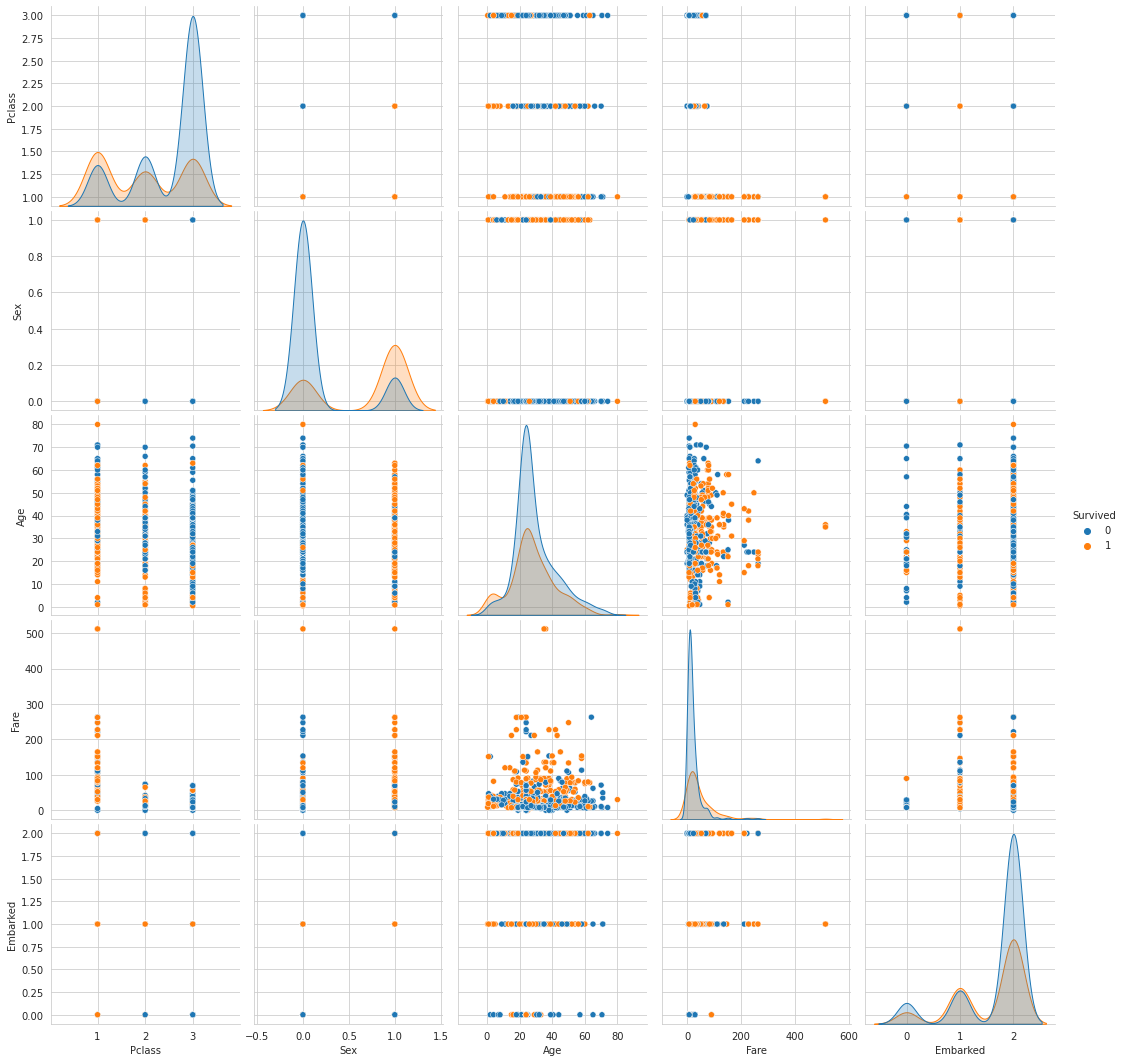

In [283]:
sns.set_style("whitegrid");
sns.pairplot(q1_df, hue="Survived", size=3);
plt.show()

### train-test split

In [353]:
from sklearn.model_selection import train_test_split
X = q1_df.iloc[:, :-1]
Y = q1_df.iloc[:, -1]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,train_size=0.7,random_state=57)

In [354]:
X_train

,Pclass,Sex,Age,Fare,Embarked
176,3,0,24.0,25.4667,2
255,3,1,29.0,15.2458,1
791,2,0,16.0,26.0000,2
581,1,1,39.0,110.8833,1
228,2,0,18.0,13.0000,2
...,...,...,...,...,...
632,1,0,32.0,30.5000,1
79,3,1,30.0,12.4750,2
406,3,0,51.0,7.7500,2
5,3,0,24.0,8.4583,0


In [355]:
Y_train

176    0
255    1
791    0
581    1
228    0
      ..
632    1
79     1
406    0
5      0
726    1
Name: Survived, Length: 623, dtype: int64

## 1.2

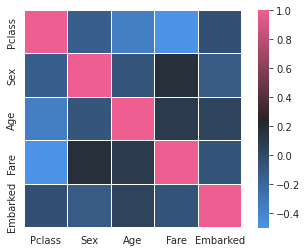

In [356]:
corr = q1_df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [357]:
# for i in q1_df.columns:
#   fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#   sns.histplot(q1_df, ax=axes[0], x=i, kde=True, color='r')

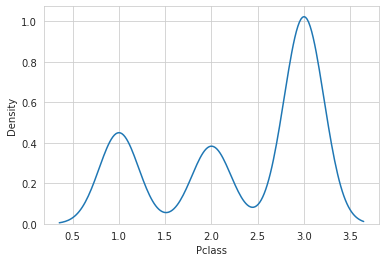

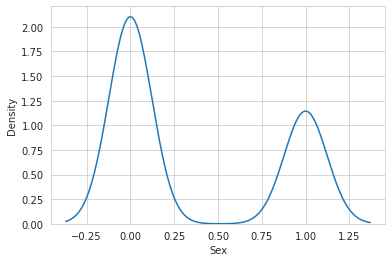

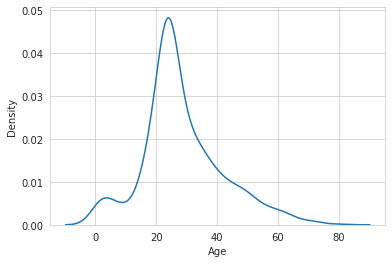

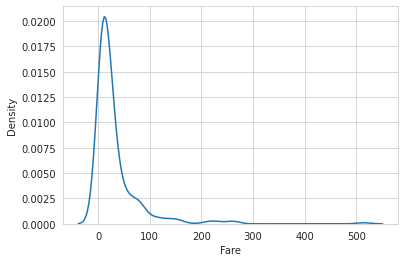

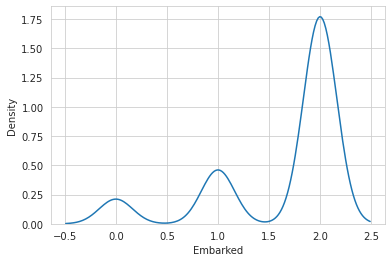

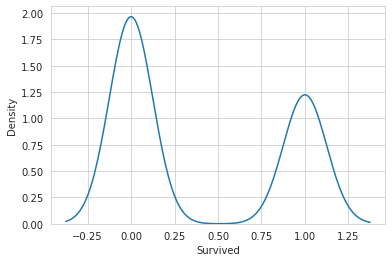

In [358]:
for i in q1_df.columns:
  fig, ax = plt.subplots()
  sns.kdeplot(q1_df[i])
  print()

## 1.3

In [359]:
X_train.groupby(by=Y_train).mean()

,Pclass,Sex,Age,Fare,Embarked
Survived,,,,,
0,2.520942,0.151832,28.921466,23.227824,1.683246
1,2.000000,0.688797,27.358921,48.073220,1.568465


In [360]:
X_train.groupby(by=Y_train).var()

,Pclass,Sex,Age,Fare,Embarked
Survived,,,,,
0,0.565177,0.129117,166.424262,1057.015508,0.400716
1,0.733333,0.215249,165.331796,5070.283539,0.404668


In [361]:
def fit(x,y):
  mean = x.groupby(by=y).mean()
  variance = x.groupby(by=y).var()
  return mean, variance

mean_train,var_train = fit(X_train,Y_train)
print("Mean",mean_train)
print()
print("Variance",var_train)

Mean             Pclass       Sex        Age       Fare  Embarked
Survived                                                    
0         2.520942  0.151832  28.921466  23.227824  1.683246
1         2.000000  0.688797  27.358921  48.073220  1.568465

Variance             Pclass       Sex         Age         Fare  Embarked
Survived                                                       
0         0.565177  0.129117  166.424262  1057.015508  0.400716
1         0.733333  0.215249  165.331796  5070.283539  0.404668


In [362]:
m = np.array(mean_train).flatten()
v = np.array(var_train).flatten()
print(m)
print(v)

[ 2.52094241  0.15183246 28.92146597 23.22782356  1.68324607  2.
  0.68879668 27.35892116 48.07321992  1.56846473]
[5.65177062e-01 1.29117368e-01 1.66424262e+02 1.05701551e+03
 4.00715945e-01 7.33333333e-01 2.15248963e-01 1.65331796e+02
 5.07028354e+03 4.04668050e-01]


In [363]:
mean_var = []
for i in range(len(m)):
  mean_var.append([m[i],v[i]])

mean_var

[[2.520942408376963, 0.5651770622912976],
 [0.1518324607329843, 0.12911736818238032],
 [28.921465968586386, 166.4242624122247],
 [23.227823560209423, 1057.0155083435902],
 [1.6832460732984293, 0.40071594453834625],
 [2.0, 0.7333333333333333],
 [0.6887966804979253, 0.21524896265560167],
 [27.358921161825727, 165.3317963312587],
 [48.07321991701245, 5070.28353895444],
 [1.5684647302904564, 0.4046680497925309]]

In [364]:
mean_var2 = np.array(mean_var)
mean_var_split = np.vsplit(mean_var2, 2)
mean_var_split

[array([[2.52094241e+00, 5.65177062e-01],
        [1.51832461e-01, 1.29117368e-01],
        [2.89214660e+01, 1.66424262e+02],
        [2.32278236e+01, 1.05701551e+03],
        [1.68324607e+00, 4.00715945e-01]]),
 array([[2.00000000e+00, 7.33333333e-01],
        [6.88796680e-01, 2.15248963e-01],
        [2.73589212e+01, 1.65331796e+02],
        [4.80732199e+01, 5.07028354e+03],
        [1.56846473e+00, 4.04668050e-01]])]

In [365]:
def gaussian(value, mean, variance):
  pi = np.pi
  e = np.e
  k = 1/(np.sqrt(2*pi*variance))
  exp = np.exp(-(((value - mean) ** 2)/(2*variance)))
  p = k*exp
  return p

In [366]:
def prior(k):
  prior = 1/2
  final_probabilities = []
  for i in k:
    class_prob = np.prod(i) * prior
    final_probabilities.append(class_prob)
  return final_probabilities

In [367]:
def predict(row):
  prob = []
  for i in range(2):
    not_survived = mean_var_split[i]
    for j in range(len(not_survived)):
      not_survived_x_mean = not_survived[j][0]
      not_survived_x_var = not_survived[j][1]
      feature_val = row[i]
    prob.append([gaussian(feature_val, not_survived_x_mean, not_survived_x_var)])
  arr = np.vsplit(np.array(prob), 2)
  final_prob = prior(arr)
  max_prob = max(final_prob)
  pred = final_prob.index(max_prob)
  return pred

In [368]:
fit(X_train,Y_train)
X_test_arr = np.array(X_test)
Y_pred = []
for i in X_test_arr:
  # print(i)
  Y_pred.append(predict(i))

print(Y_pred)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [369]:
def accuracy(pred,actual):
  right,wrong = 0,0
  for i in range(len(pred)):
    if(pred[i]==actual[i]):
      right+=1
    else:
      wrong+=1
  return (right*100)/(right+wrong)

accuracy(Y_pred,np.array(Y_test))

73.88059701492537

## 1.4

In [301]:
# k fold cross validation
train = pd.concat([Y_train,X_train],axis=1)

from random import sample,randrange
def cross_val_split(data,folds):
  splits = []
  num_of_elements = int(data.shape[0]/ folds)
  df_copy = data
  for i in range(folds):
    fold = []
    while(len(fold)<num_of_elements):
      r = randrange(df_copy.shape[0])
      index = df_copy.index[r]
      fold.append(df_copy.loc[index].values.tolist())
      df_copy = df_copy.drop(index)
    splits.append(np.asarray(fold))
  return splits

def kfold_CV(data,folds):
  df_data = cross_val_split(data,folds)
  avg_train = []
  avg_test = []
  result_train = []
  result_test = []
  for i in range(folds):
    r = list(range(folds))
    r.pop(i)
    for j in r :
      if j == r[0]:
        cv = df_data[j]
      else:    
        cv=np.concatenate((cv,df_data[j]), axis=0)
    # print(cv.shape,df_data[i].shape,train.shape)
    cv_pd = pd.DataFrame(cv, columns=[i for i in train.columns])
    fit(cv_pd.iloc[:,1:],cv_pd.iloc[:,0])
    x_pred = []
    for j in range(len(cv)):
      x_pred.append(predict(cv[j,1:]))
    x_act = cv[:,0]
    result_train.append(accuracy(x_pred,x_act))
    y_pred = []
    for j in range(len(df_data[i])):
      y_pred.append(predict(df_data[i][j,1:]))
    y_act = df_data[i][:,0]
    result_test.append(accuracy(y_pred,y_act))
  # avg_train.append(sum(result_train)/folds)
  # avg_test.append(sum(result_test)/folds)
  print("MSE of each fold :",result_test)
  print("Average of folds :",sum(result_test)/folds)
  return result_train,result_test

result_train,result_test = kfold_CV(train,5)

MSE of each fold : [79.83870967741936, 68.54838709677419, 66.93548387096774, 70.96774193548387, 67.74193548387096]
Average of folds : 70.80645161290322


## 1.5

In [302]:
print("Accuracy on training set :",result_train)
print("Average of training folds :",sum(result_train)/5)
print()
print("Accuracy on testing set :",result_test)
print("Average of testing folds :",sum(result_test)/5)

Accuracy on training set : [68.54838709677419, 71.37096774193549, 71.7741935483871, 70.76612903225806, 71.5725806451613]
Average of training folds : 70.80645161290323

Accuracy on testing set : [79.83870967741936, 68.54838709677419, 66.93548387096774, 70.96774193548387, 67.74193548387096]
Average of testing folds : 70.80645161290322


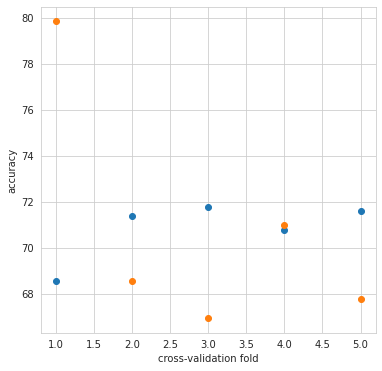

In [303]:
plt.figure(figsize=(6,6))
x = [i for i in range(1,6)]
plt.scatter(x,result_train)
plt.scatter(x,result_test)
plt.xlabel('cross-validation fold')
plt.ylabel('accuracy')
plt.show()

## 1.6

In [304]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gauss = GaussianNB()
res_gauss = gauss.fit(X_train, Y_train)
print("Average score of scratch on training set :", (sum(result_train)/5))
print("Average score of inbuilt on training set :",metrics.accuracy_score(Y_train, res_gauss.predict(X_train)) * 100)
print()
print("Average score of scratch on testing set :", (sum(result_test)/5))
print("Average score of inbuilt on testing set :",metrics.accuracy_score(Y_test, res_gauss.predict(X_test)) * 100)

Average score of scratch on training set : 70.80645161290323
Average score of inbuilt on training set : 78.00963081861958

Average score of scratch on testing set : 70.80645161290322
Average score of inbuilt on testing set : 78.35820895522389


In [305]:
from sklearn.model_selection import cross_val_score
print("Training set :",cross_val_score(gauss,X_train,Y_train)*100)
print("Testing set :",cross_val_score(gauss,X_test,Y_test)*100)

Training set : [75.2        88.         69.6        73.38709677 80.64516129]
Testing set : [81.48148148 74.07407407 72.22222222 79.24528302 83.01886792]


## 1.7

In [306]:
from sklearn.naive_bayes import MultinomialNB

cl_multi = MultinomialNB()
res_multi = cl_multi.fit(X_train, Y_train)
Y_pred = res_multi.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred) * 100

70.52238805970148

In [307]:
from sklearn.model_selection import cross_val_score
print("Training set :",cross_val_score(res_multi,X_train,Y_train)*100)
print("Testing set :",cross_val_score(res_multi,X_test,Y_test)*100)
print()
print("Avg on training set :",sum(cross_val_score(res_multi,X_train,Y_train)*100)/5)
print("Avg on testing set :",sum(cross_val_score(res_multi,X_test,Y_test)*100)/5)

Training set : [72.         74.4        60.8        67.74193548 69.35483871]
Testing set : [66.66666667 75.92592593 75.92592593 69.81132075 67.9245283 ]

Avg on training set : 68.85935483870968
Avg on testing set : 71.25087351502445


# **Question 2**

## Pre-processing

In [308]:
q2_df = pd.read_csv('dataset.txt',delim_whitespace=True,header=None,names=['Area','Perimeter','Compactness','Length of Kernel','Width of kernel','Asymmetry coefficient','Length of kernel groove','Class'])
q2_df

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [309]:
q2_df.shape

(210, 8)

In [310]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [311]:
q2_df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [312]:
q2_df.loc[:, q2_df.isnull().any()].columns

Index([], dtype='object')

In [313]:
q2_df_copy = q2_df.copy(deep=True)

## 2.1

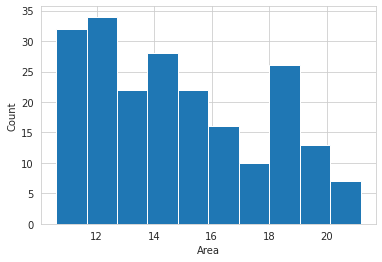

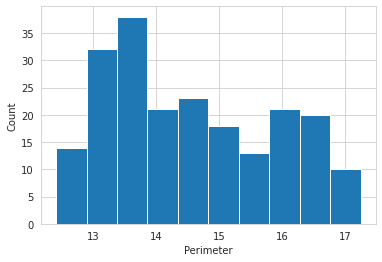

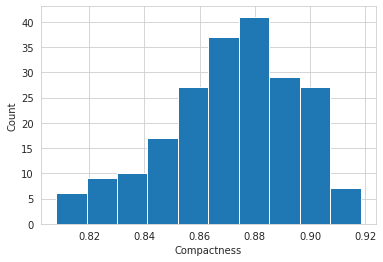

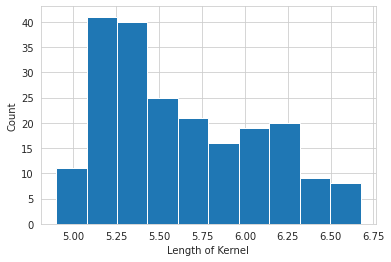

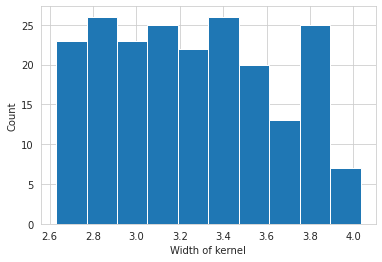

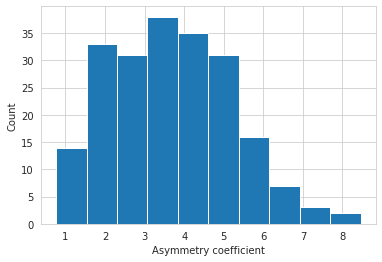

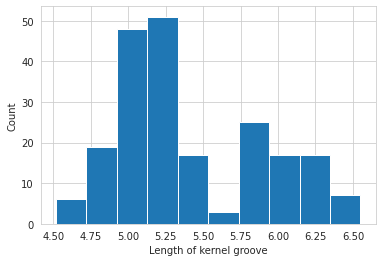

In [314]:
for i in range(len(q2_df.columns)-1):
  x = q2_df.to_numpy()[:,i]
  plt.hist(x)
  plt.xlabel(q2_df.columns[i])
  plt.ylabel("Count")
  plt.show()

## 2.2

In [315]:
np.unique(q2_df['Class'])

array([1, 2, 3])

In [316]:
pd.value_counts(q2_df['Class'])

1    70
2    70
3    70
Name: Class, dtype: int64

In [317]:
no_of_samples = len(q2_df['Class'])
prob_1 = (q2_df['Class'] == 1).sum()/no_of_samples
prob_2 = (q2_df['Class'] == 2).sum()/no_of_samples
prob_3 = (q2_df['Class'] == 3).sum()/no_of_samples
print("Prior Class 1: ",prob_1)
print("Prior Class 2: ",prob_2)
print("Prior Class 3: ",prob_2)

Prior Class 1:  0.3333333333333333
Prior Class 2:  0.3333333333333333
Prior Class 3:  0.3333333333333333


## 2.3

In [318]:
q2_df

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [319]:
# create labels from the data
def labels(col):
  data = pd.DataFrame(col)
  data['Class'] = q2_df['Class']
  # print(data)
  data = data.to_numpy()
  label = []
  x_c1 = []
  x_c2 = []
  x_c3 = []
  c1_count = 0
  c2_count = 0
  c3_count = 0
  # print(data.shape[0])
  for i in range(data.shape[0]):
    # print('data',data[i][1])
    if(data[i][1] == 1):
      label.append(1)
      x_c1.append(data[i][0])
      c1_count += 1
    elif(data[i][1] == 2):
      label.append(2)
      x_c2.append(data[i][0])
      c2_count += 1
    else:
      label.append(3)
      x_c3.append(data[i][0])
      c3_count += 1
  # print('Yes')
  return x_c1,x_c2,x_c3

# print(labels(q2_df['Area']))

In [320]:
from collections import OrderedDict
import math

def bins(col1):
  col = col1.to_numpy()
  x = []
  x = col
  num_of_bins = 5
  X_dict = OrderedDict()
  x_old ={}
  x_new ={}
  for i in range(len(x)):
    X_dict[i]= x[i]
    x_old[i]= x[i]
  x_dict = sorted(X_dict.items(), key = lambda x: x[1])
  binn = []
  num_of_data_in_each_bin = int(math.ceil(len(x)/num_of_bins))
  i=0
  k=0
  app = []
  for g, h in X_dict.items():
    if(i<num_of_data_in_each_bin):
        i = i + 1
        app.append(x_dict[g])
    elif(i == num_of_data_in_each_bin):
        app.append(x_dict[g])
        binn.append(app)
        app = []
        k = k + 1
        i = 0
        i = i + 1
  if len(app)!=0:
    binn.append(app)
  # print(math.ceil(len(x)/num_of_bins))
  # print("binn",binn)
  for i in range(len(binn)):
    for j in binn[i]:
      # print(q2_df.iloc[1,1])
      # print(q2_df.columns.get_loc(col1.name))
      q2_df.iloc[j[0],q2_df.columns.get_loc(col1.name)] = i+1

for i in q2_df.columns[:-1]:
  bins(q2_df[i])
# q2_df['Area'].value_counts()
q2_df.value_counts()

Area  Perimeter  Compactness  Length of Kernel  Width of kernel  Asymmetry coefficient  Length of kernel groove  Class
1.0   1.0        1.0          2.0               1.0              5.0                    3.0                      3        7
4.0   4.0        2.0          4.0               4.0              4.0                    4.0                      2        4
1.0   1.0        1.0          1.0               1.0              5.0                    2.0                      3        4
5.0   5.0        5.0          5.0               5.0              2.0                    5.0                      2        4
                 3.0          5.0               5.0              3.0                    5.0                      2        3
                                                                                                                         ..
2.0   3.0        2.0          2.0               2.0              5.0                    3.0                      3        1
             

##2.4

P(x=1)/(y=1) : 0.04285714285714286
P(x=2)/(y=1) : 0.17142857142857143
P(x=3)/(y=1) : 0.6
P(x=4)/(y=1) : 0.18571428571428572
P(x=4)/(y=2) : 0.4142857142857143
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.5714285714285714
P(x=2)/(y=3) : 0.42857142857142855


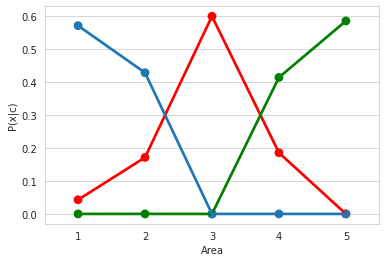

P(x=1)/(y=1) : 0.05714285714285714
P(x=2)/(y=1) : 0.18571428571428572
P(x=3)/(y=1) : 0.5571428571428572
P(x=4)/(y=1) : 0.2
P(x=3)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.4
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.5571428571428572
P(x=2)/(y=3) : 0.4142857142857143
P(x=3)/(y=3) : 0.02857142857142857


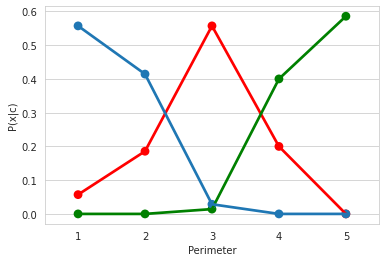

P(x=1)/(y=1) : 0.02857142857142857
P(x=2)/(y=1) : 0.2
P(x=3)/(y=1) : 0.2571428571428571
P(x=4)/(y=1) : 0.2714285714285714
P(x=5)/(y=1) : 0.24285714285714285
P(x=1)/(y=2) : 0.02857142857142857
P(x=2)/(y=2) : 0.14285714285714285
P(x=3)/(y=2) : 0.24285714285714285
P(x=4)/(y=2) : 0.2714285714285714
P(x=5)/(y=2) : 0.3142857142857143
P(x=1)/(y=3) : 0.5571428571428572
P(x=2)/(y=3) : 0.2571428571428571
P(x=3)/(y=3) : 0.1
P(x=4)/(y=3) : 0.05714285714285714
P(x=5)/(y=3) : 0.02857142857142857


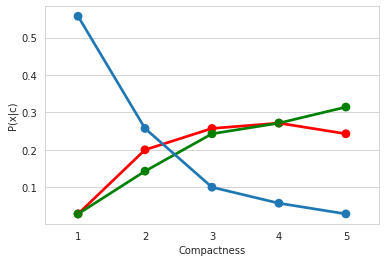

P(x=1)/(y=1) : 0.12857142857142856
P(x=2)/(y=1) : 0.21428571428571427
P(x=3)/(y=1) : 0.44285714285714284
P(x=4)/(y=1) : 0.21428571428571427
P(x=2)/(y=2) : 0.014285714285714285
P(x=3)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.38571428571428573
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.4857142857142857
P(x=2)/(y=3) : 0.37142857142857144
P(x=3)/(y=3) : 0.14285714285714285


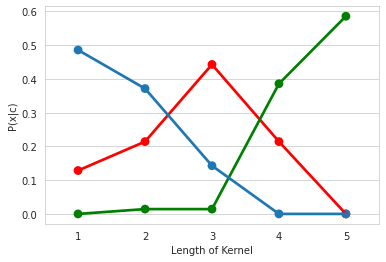

P(x=1)/(y=1) : 0.014285714285714285
P(x=2)/(y=1) : 0.24285714285714285
P(x=3)/(y=1) : 0.5142857142857142
P(x=4)/(y=1) : 0.21428571428571427
P(x=5)/(y=1) : 0.014285714285714285
P(x=3)/(y=2) : 0.04285714285714286
P(x=4)/(y=2) : 0.38571428571428573
P(x=5)/(y=2) : 0.5714285714285714
P(x=1)/(y=3) : 0.6
P(x=2)/(y=3) : 0.35714285714285715
P(x=3)/(y=3) : 0.04285714285714286


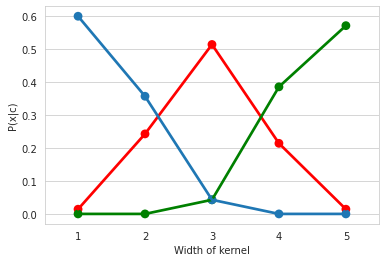

P(x=1)/(y=1) : 0.4
P(x=2)/(y=1) : 0.34285714285714286
P(x=3)/(y=1) : 0.14285714285714285
P(x=4)/(y=1) : 0.07142857142857142
P(x=5)/(y=1) : 0.04285714285714286
P(x=1)/(y=2) : 0.17142857142857143
P(x=2)/(y=2) : 0.21428571428571427
P(x=3)/(y=2) : 0.2571428571428571
P(x=4)/(y=2) : 0.21428571428571427
P(x=5)/(y=2) : 0.14285714285714285
P(x=1)/(y=3) : 0.04285714285714286
P(x=2)/(y=3) : 0.04285714285714286
P(x=3)/(y=3) : 0.2
P(x=4)/(y=3) : 0.3142857142857143
P(x=5)/(y=3) : 0.4


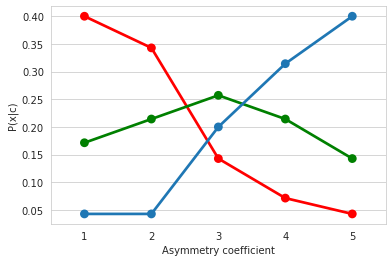

P(x=1)/(y=1) : 0.37142857142857144
P(x=2)/(y=1) : 0.22857142857142856
P(x=3)/(y=1) : 0.2571428571428571
P(x=4)/(y=1) : 0.14285714285714285
P(x=2)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.4
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.24285714285714285
P(x=2)/(y=3) : 0.35714285714285715
P(x=3)/(y=3) : 0.34285714285714286
P(x=4)/(y=3) : 0.05714285714285714


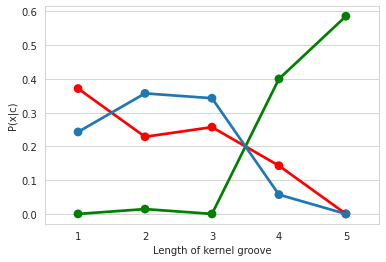

In [321]:
from collections import Counter

def likelihood(j):
  x_c1,x_c2,x_c3 = labels(q2_df[j])
  x_c1,x_c2,x_c3 = sorted(x_c1),sorted(x_c2),sorted(x_c3)
  unique_c1 = Counter(x_c1).keys()
  count_unique_c1 = list(Counter(x_c1).values()) 
  # print(dict(Counter(x_c1)))
  y1 = [0 for i in range(5)]
  y2 = [0 for i in range(5)]
  y3 = [0 for i in range(5)]
  for i in dict(Counter(x_c1)):
    y1[int(i)-1] = dict(Counter(x_c1))[i] / len(x_c1)
    print("P(x="+str(int(i))+")/(y=1) :",y1[int(i)-1])
  for i in dict(Counter(x_c2)):
    y2[int(i)-1] = dict(Counter(x_c2))[i] / len(x_c2)
    print("P(x="+str(int(i))+")/(y=2) :",y2[int(i)-1])
  for i in dict(Counter(x_c3)):
    y3[int(i)-1] = dict(Counter(x_c3))[i] / len(x_c3)
    print("P(x="+str(int(i))+")/(y=3) :",y3[int(i)-1])
  
  # print(y1)
  # print(y2)
  # print(y3)
  # print(Counter(x_c2))
  # print(Counter(x_c3))
  # unique_c2 = Counter(x_c2).keys() 
  # count_unique_c2 = list(Counter(x_c2).values()) 
  # unique_c3 = Counter(x_c3).keys() 
  # count_unique_c3 = list(Counter(x_c3).values())
  # y1 = np.array(count_unique_c1)/len(x_c1)
  
  return y1,y2,y3

for j in q2_df.columns[:-1]:
  y1,y2,y3 = likelihood(j)
  sns.pointplot([i for i in range(1,6)],y1, linestyles="-",markers =['o'],color='red' )
  # y2 = np.array(count_unique_c2)/len(x_c2)
  sns.pointplot([i for i in range(1,6)],y2,linestyles='-',markers=['o'],color='green')
  # y3 = np.array(count_unique_c3)/len(x_c3)
  sns.pointplot([i for i in range(1,6)],y3, linestyles="-",markers =['o'] )
  plt.xlabel(j)
  plt.ylabel("P(x|c)")
  plt.show()

## 2.5

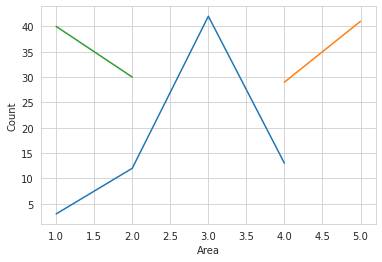

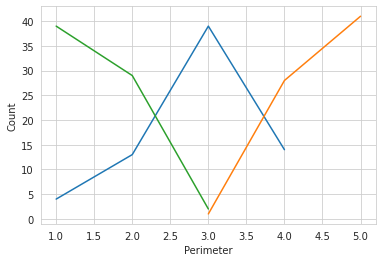

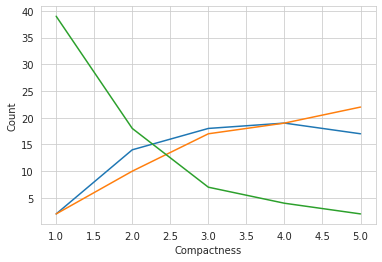

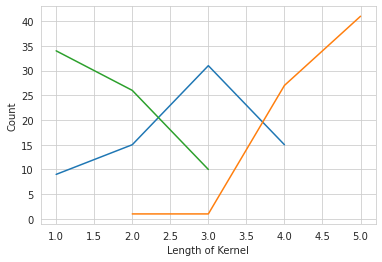

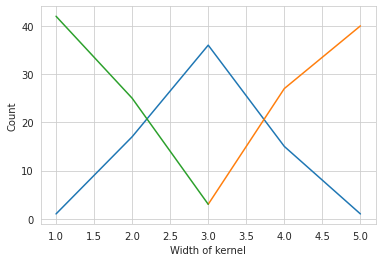

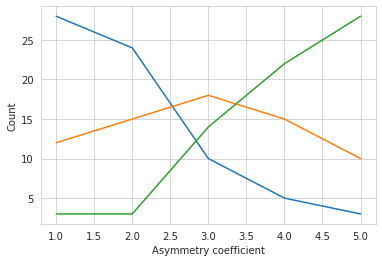

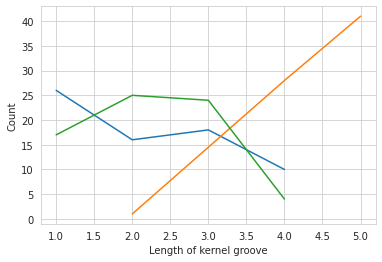

In [322]:
from collections import Counter

def unique(i):
    x_c1,x_c2,x_c3 = labels(q2_df[i])
    unique_c1 = Counter(x_c1).keys() 
    count_unique_c1 = list(Counter(x_c1).values()) 
    unique_c2 = Counter(x_c2).keys() 
    count_unique_c2 = list(Counter(x_c2).values()) 
    unique_c3 = Counter(x_c3).keys() 
    count_unique_c3 = list(Counter(x_c3).values())
    # print('For column :',i)
    # print(len(count_unique_c1),unique_c1,count_unique_c1)
    return unique_c1,count_unique_c1,unique_c2,count_unique_c2,unique_c3,count_unique_c3
    

for i in q2_df.columns[:-1]:
  unique_c1,count_unique_c1,unique_c2,count_unique_c2,unique_c3,count_unique_c3 = unique(i)
  sns.lineplot(list(unique_c1),count_unique_c1)
  sns.lineplot(list(unique_c2),count_unique_c2)
  sns.lineplot(list(unique_c3),count_unique_c3)
  plt.xlabel(i)
  plt.ylabel("Count")
  plt.show()
  print()

## 2.6

P(x=1)/(y=1) : 0.04285714285714286
P(x=2)/(y=1) : 0.17142857142857143
P(x=3)/(y=1) : 0.6
P(x=4)/(y=1) : 0.18571428571428572
P(x=4)/(y=2) : 0.4142857142857143
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.5714285714285714
P(x=2)/(y=3) : 0.42857142857142855
Evidence Array:  [0.2       0.2       0.2       0.2047619 0.1952381]
Posterior C1:  [0.07142857142857142, 0.2857142857142857, 0.9999999999999999, 0.3023255813953489, 0.0]
Posterior C2:  [0.0, 0.0, 0.0, 0.1380952380952381, 0.19523809523809524]
Posterior C3:  [0.9523809523809523, 0.6976744186046512, 0.0, 0.0, 0.0]


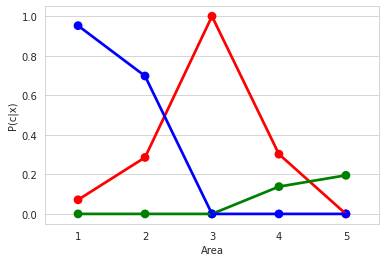

P(x=1)/(y=1) : 0.05714285714285714
P(x=2)/(y=1) : 0.18571428571428572
P(x=3)/(y=1) : 0.5571428571428572
P(x=4)/(y=1) : 0.2
P(x=3)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.4
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.5571428571428572
P(x=2)/(y=3) : 0.4142857142857143
P(x=3)/(y=3) : 0.02857142857142857
Evidence Array:  [0.2       0.2       0.2       0.2047619 0.1952381]
Posterior C1:  [0.09523809523809522, 0.30952380952380953, 0.9285714285714286, 0.32558139534883723, 0.0]
Posterior C2:  [0.0, 0.0, 0.023809523809523805, 0.13333333333333333, 0.19523809523809524]
Posterior C3:  [0.9285714285714286, 0.6904761904761905, 0.046511627906976744, 0.0, 0.0]


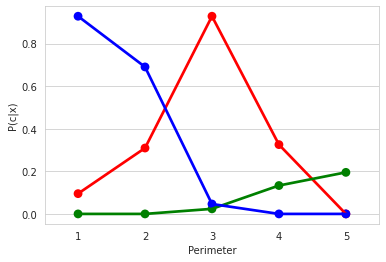

P(x=1)/(y=1) : 0.02857142857142857
P(x=2)/(y=1) : 0.2
P(x=3)/(y=1) : 0.2571428571428571
P(x=4)/(y=1) : 0.2714285714285714
P(x=5)/(y=1) : 0.24285714285714285
P(x=1)/(y=2) : 0.02857142857142857
P(x=2)/(y=2) : 0.14285714285714285
P(x=3)/(y=2) : 0.24285714285714285
P(x=4)/(y=2) : 0.2714285714285714
P(x=5)/(y=2) : 0.3142857142857143
P(x=1)/(y=3) : 0.5571428571428572
P(x=2)/(y=3) : 0.2571428571428571
P(x=3)/(y=3) : 0.1
P(x=4)/(y=3) : 0.05714285714285714
P(x=5)/(y=3) : 0.02857142857142857
Evidence Array:  [0.2       0.2       0.1952381 0.2       0.2047619]
Posterior C1:  [0.04761904761904761, 0.3333333333333333, 0.4390243902439024, 0.4523809523809523, 0.3953488372093023]
Posterior C2:  [0.04761904761904761, 0.23809523809523808, 0.41463414634146334, 0.4523809523809523, 0.5116279069767441]
Posterior C3:  [0.9069767441860466, 0.4285714285714285, 0.16666666666666666, 0.09523809523809522, 0.048780487804878044]


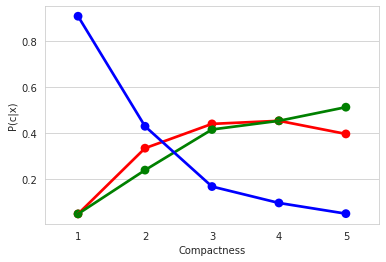

P(x=1)/(y=1) : 0.12857142857142856
P(x=2)/(y=1) : 0.21428571428571427
P(x=3)/(y=1) : 0.44285714285714284
P(x=4)/(y=1) : 0.21428571428571427
P(x=2)/(y=2) : 0.014285714285714285
P(x=3)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.38571428571428573
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.4857142857142857
P(x=2)/(y=3) : 0.37142857142857144
P(x=3)/(y=3) : 0.14285714285714285
Evidence Array:  [0.2       0.2       0.2       0.2047619 0.1952381]
Posterior C1:  [0.21428571428571425, 0.3571428571428571, 0.7380952380952379, 0.3488372093023256, 0.0]
Posterior C2:  [0.0, 0.023809523809523805, 0.023809523809523805, 0.6428571428571428, 0.19523809523809524]
Posterior C3:  [0.8095238095238094, 0.6190476190476191, 0.23255813953488372, 0.0, 0.0]


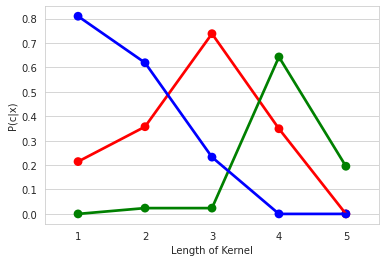

P(x=1)/(y=1) : 0.014285714285714285
P(x=2)/(y=1) : 0.24285714285714285
P(x=3)/(y=1) : 0.5142857142857142
P(x=4)/(y=1) : 0.21428571428571427
P(x=5)/(y=1) : 0.014285714285714285
P(x=3)/(y=2) : 0.04285714285714286
P(x=4)/(y=2) : 0.38571428571428573
P(x=5)/(y=2) : 0.5714285714285714
P(x=1)/(y=3) : 0.6
P(x=2)/(y=3) : 0.35714285714285715
P(x=3)/(y=3) : 0.04285714285714286
Evidence Array:  [0.2       0.2       0.2       0.1952381 0.2047619]
Posterior C1:  [0.023809523809523805, 0.4047619047619047, 0.857142857142857, 0.36585365853658536, 0.023255813953488372]
Posterior C2:  [0.0, 0.0, 0.07142857142857142, 0.12857142857142856, 0.19047619047619047]
Posterior C3:  [0.9999999999999999, 0.5813953488372093, 0.07142857142857142, 0.0, 0.0]


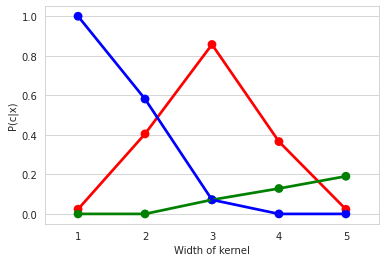

P(x=1)/(y=1) : 0.4
P(x=2)/(y=1) : 0.34285714285714286
P(x=3)/(y=1) : 0.14285714285714285
P(x=4)/(y=1) : 0.07142857142857142
P(x=5)/(y=1) : 0.04285714285714286
P(x=1)/(y=2) : 0.17142857142857143
P(x=2)/(y=2) : 0.21428571428571427
P(x=3)/(y=2) : 0.2571428571428571
P(x=4)/(y=2) : 0.21428571428571427
P(x=5)/(y=2) : 0.14285714285714285
P(x=1)/(y=3) : 0.04285714285714286
P(x=2)/(y=3) : 0.04285714285714286
P(x=3)/(y=3) : 0.2
P(x=4)/(y=3) : 0.3142857142857143
P(x=5)/(y=3) : 0.4
Evidence Array:  [0.2047619 0.2       0.2       0.2       0.1952381]
Posterior C1:  [0.6511627906976745, 0.5714285714285714, 0.23809523809523808, 0.11904761904761904, 0.07317073170731707]
Posterior C2:  [0.2857142857142857, 0.3571428571428571, 0.4285714285714285, 0.36585365853658536, 0.23255813953488372]
Posterior C3:  [0.07317073170731707, 0.07142857142857142, 0.32558139534883723, 0.5238095238095237, 0.6666666666666666]


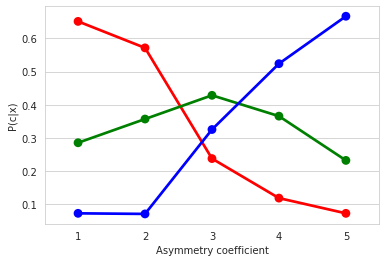

P(x=1)/(y=1) : 0.37142857142857144
P(x=2)/(y=1) : 0.22857142857142856
P(x=3)/(y=1) : 0.2571428571428571
P(x=4)/(y=1) : 0.14285714285714285
P(x=2)/(y=2) : 0.014285714285714285
P(x=4)/(y=2) : 0.4
P(x=5)/(y=2) : 0.5857142857142857
P(x=1)/(y=3) : 0.24285714285714285
P(x=2)/(y=3) : 0.35714285714285715
P(x=3)/(y=3) : 0.34285714285714286
P(x=4)/(y=3) : 0.05714285714285714
Evidence Array:  [0.2       0.2047619 0.2       0.2       0.1952381]
Posterior C1:  [0.6190476190476191, 0.37209302325581395, 0.4285714285714285, 0.23809523809523808, 0.0]
Posterior C2:  [0.0, 0.023809523809523805, 0.0, 0.13333333333333333, 0.19523809523809524]
Posterior C3:  [0.4047619047619047, 0.5952380952380951, 0.5714285714285714, 0.09302325581395349, 0.0]


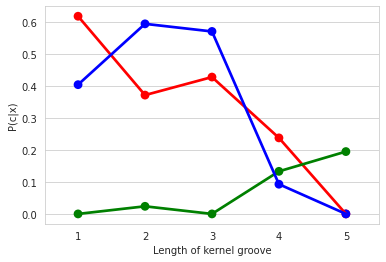

In [323]:
for j in q2_df.columns[:-1]:
  y1,y2,y3 = likelihood(j)
  x_c1,x_c2,x_c3 = labels(q2_df[j])
  unique_c1,count_unique_c1,unique_c2,count_unique_c2,unique_c3,count_unique_c3 = unique(j)
  p_1 = [i*prob_1 for i in y1]
  p_2 = [i*prob_2 for i in y2]
  p_3 = [i*prob_3 for i in y3]
  e_key = list(Counter(x_c1+x_c2+x_c3).keys())
  e_value = list(Counter(x_c1+x_c2+x_c3).values())
  evidence_array = np.array(e_value)/(len(x_c1)+len(x_c2)+len(x_c3))
  print("Evidence Array: ", evidence_array)

  posterior_c1 = p_1
  unique_c1_list= list(unique_c1)

  for i in range(len(unique_c1)):
    x = unique_c1_list[i]
    position = e_key.index(x)
    evidence = evidence_array[position]
    posterior_c1[i] = posterior_c1[i]/evidence

  posterior_c2 = p_2
  unique_c2_list= list(unique_c2)

  for i in range(len(unique_c2)):
    x = unique_c2_list[i]
    position = e_key.index(x)
    evidence = evidence_array[position]
    posterior_c2[i] = posterior_c2[i]/evidence

  posterior_c3 = p_3
  unique_c3_list= list(unique_c3)

  for i in range(len(unique_c3)):
    x = unique_c3_list[i]
    position = e_key.index(x)
    evidence = evidence_array[position]
    posterior_c3[i] = posterior_c3[i]/evidence

  print("Posterior C1: ", posterior_c1)
  print("Posterior C2: ", posterior_c2)
  print("Posterior C3: ", posterior_c3)
  sns.pointplot([i for i in range(1,6)],posterior_c1, linestyles="-",markers =['o'],color='red')
  sns.pointplot([i for i in range(1,6)],posterior_c2, linestyles="-",markers =['o'],color='green')
  sns.pointplot([i for i in range(1,6)],posterior_c3, linestyles="-",markers =['o'],color='blue')
  plt.xlabel(j)
  plt.ylabel("P(c|x)")
  plt.show()